Data Loading

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_directory = 'C:/Users/PC/Documents/AI_PROJECt/train'
val_directory = 'C:/Users/PC/Documents/AI_PROJECT/val'
test_directory = 'C:/Users/PC/Documents/AI_PROJECT/test'

# Define image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 5522 images belonging to 10 classes.
Found 2256 images belonging to 10 classes.
Found 2092 images belonging to 10 classes.


ResNet50

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def create_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = Dense(1024, activation='relu')(x)
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

resnet_model = create_resnet_model()
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


Training


In [7]:
import time

def train_model(model, train_generator, val_generator, epochs=50):
    start_time = time.time()
    history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)
    training_time = time.time() - start_time
    return history, training_time

history_resnet, training_time_resnet = train_model(resnet_model, train_generator, val_generator)


Epoch 1/50
173/173 [==============================] - 76s 423ms/step - loss: 1.3680 - accuracy: 0.5954 - val_loss: 36.4939 - val_accuracy: 0.0674
Epoch 2/50
173/173 [==============================] - 65s 374ms/step - loss: 0.7939 - accuracy: 0.7526 - val_loss: 4.1532 - val_accuracy: 0.0674
Epoch 3/50
173/173 [==============================] - 63s 365ms/step - loss: 0.5483 - accuracy: 0.8305 - val_loss: 2.8815 - val_accuracy: 0.0940
Epoch 4/50
173/173 [==============================] - 63s 363ms/step - loss: 0.4307 - accuracy: 0.8656 - val_loss: 2.1642 - val_accuracy: 0.2974
Epoch 5/50
173/173 [==============================] - 63s 363ms/step - loss: 0.3488 - accuracy: 0.8932 - val_loss: 2.2235 - val_accuracy: 0.3803
Epoch 6/50
173/173 [==============================] - 63s 364ms/step - loss: 0.2753 - accuracy: 0.9105 - val_loss: 4.0069 - val_accuracy: 0.3280
Epoch 7/50
173/173 [==============================] - 63s 362ms/step - loss: 0.2561 - accuracy: 0.9225 - val_loss: 2.3203 - val_a

Evaluation


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def evaluate_model(model, test_generator):
    test_loss, test_accuracy = model.evaluate(test_generator)
    y_true = test_generator.classes
    y_pred = np.argmax(model.predict(test_generator), axis=-1)
    cm = confusion_matrix(y_true, y_pred)
    return test_accuracy, cm

accuracy_resnet, cm_resnet = evaluate_model(resnet_model, test_generator)


66/66 [==============================] - 17s 241ms/step


DenseNet121

In [9]:
from tensorflow.keras.applications import DenseNet121

def create_densenet_model():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

densenet_model = create_densenet_model()
densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


Training


In [10]:
history_densenet, training_time_densenet = train_model(densenet_model, train_generator, val_generator)


Epoch 1/50
173/173 [==============================] - 73s 382ms/step - loss: 1.0335 - accuracy: 0.6909 - val_loss: 2.7542 - val_accuracy: 0.4570
Epoch 2/50
173/173 [==============================] - 63s 362ms/step - loss: 0.6102 - accuracy: 0.8077 - val_loss: 1.1545 - val_accuracy: 0.6777
Epoch 3/50
173/173 [==============================] - 64s 367ms/step - loss: 0.4799 - accuracy: 0.8446 - val_loss: 2.0876 - val_accuracy: 0.5900
Epoch 4/50
173/173 [==============================] - 62s 360ms/step - loss: 0.4146 - accuracy: 0.8687 - val_loss: 2.1507 - val_accuracy: 0.5222
Epoch 5/50
173/173 [==============================] - 62s 355ms/step - loss: 0.3307 - accuracy: 0.8980 - val_loss: 2.2985 - val_accuracy: 0.6051
Epoch 6/50
173/173 [==============================] - 63s 362ms/step - loss: 0.3293 - accuracy: 0.8970 - val_loss: 1.4124 - val_accuracy: 0.6574
Epoch 7/50
173/173 [==============================] - 61s 350ms/step - loss: 0.2853 - accuracy: 0.9129 - val_loss: 1.1708 - val_ac

Evaluation


In [11]:
accuracy_densenet, cm_densenet = evaluate_model(densenet_model, test_generator)


66/66 [==============================] - 17s 241ms/step


MobileNetV3

In [12]:
from tensorflow.keras.applications import MobileNetV3Small

def create_mobilenet_model():
    base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

mobilenet_model = create_mobilenet_model()
mobilenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


Training


In [13]:
history_mobilenet, training_time_mobilenet = train_model(mobilenet_model, train_generator, val_generator)


Epoch 1/50
173/173 [==============================] - 64s 356ms/step - loss: 0.8695 - accuracy: 0.7189 - val_loss: 2.9091 - val_accuracy: 0.0674
Epoch 2/50
173/173 [==============================] - 62s 360ms/step - loss: 0.4329 - accuracy: 0.8622 - val_loss: 3.0886 - val_accuracy: 0.0864
Epoch 3/50
173/173 [==============================] - 60s 349ms/step - loss: 0.2931 - accuracy: 0.9038 - val_loss: 2.8324 - val_accuracy: 0.0603
Epoch 4/50
173/173 [==============================] - 60s 343ms/step - loss: 0.2338 - accuracy: 0.9259 - val_loss: 3.0753 - val_accuracy: 0.0873
Epoch 5/50
173/173 [==============================] - 59s 338ms/step - loss: 0.1812 - accuracy: 0.9379 - val_loss: 4.2854 - val_accuracy: 0.0864
Epoch 6/50
173/173 [==============================] - 59s 338ms/step - loss: 0.1695 - accuracy: 0.9449 - val_loss: 5.4763 - val_accuracy: 0.0864
Epoch 7/50
173/173 [==============================] - 59s 338ms/step - loss: 0.1194 - accuracy: 0.9625 - val_loss: 6.4291 - val_ac

Evaluation


In [14]:
accuracy_mobilenet, cm_mobilenet = evaluate_model(mobilenet_model, test_generator)


66/66 [==============================] - 17s 250ms/step


Performance Visualisation of All Models

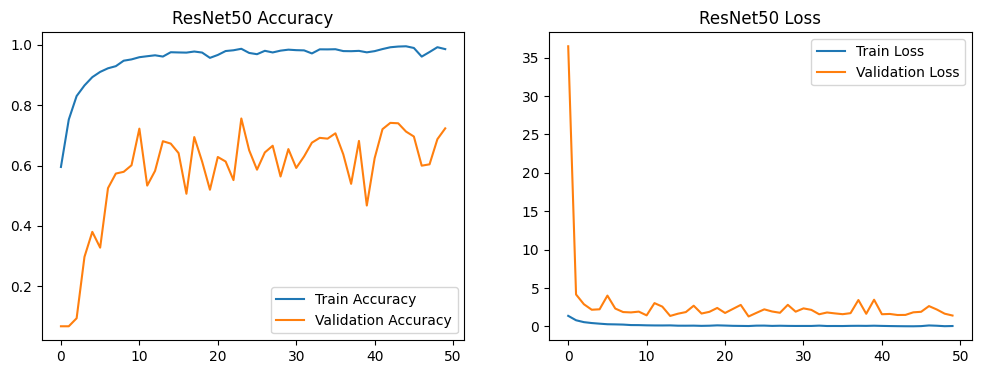

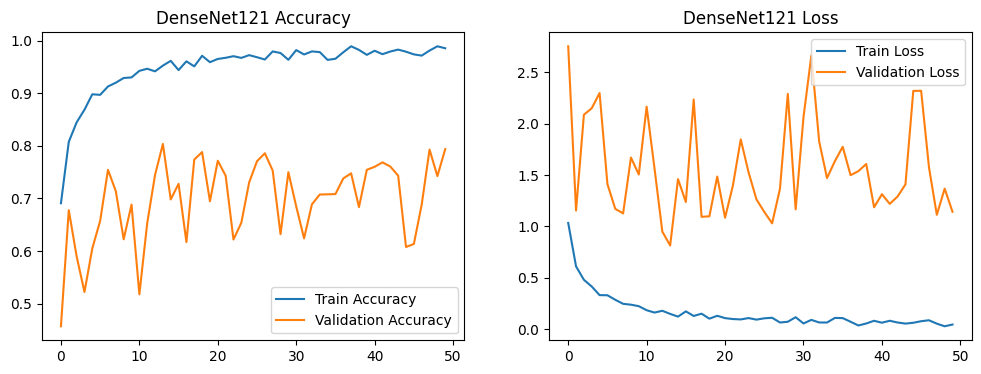

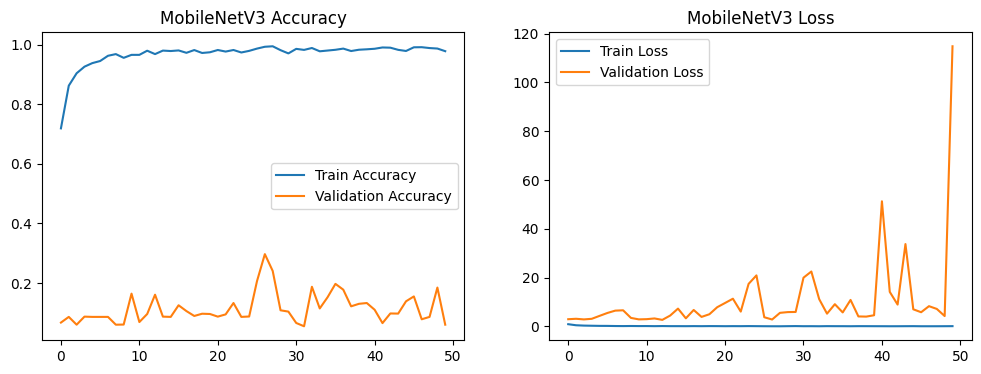

In [15]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

plot_training_history(history_resnet, 'ResNet50')

plot_training_history(history_densenet, 'DenseNet121')

plot_training_history(history_mobilenet, 'MobileNetV3')


Confusion Matrix of All Models

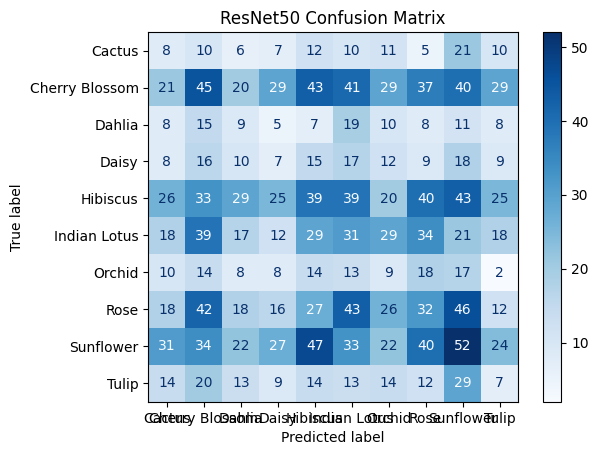

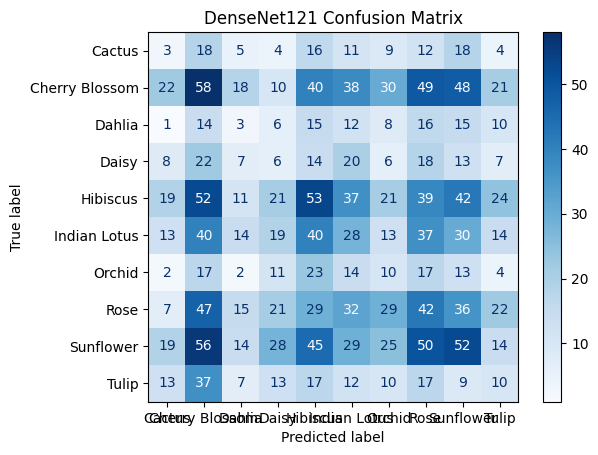

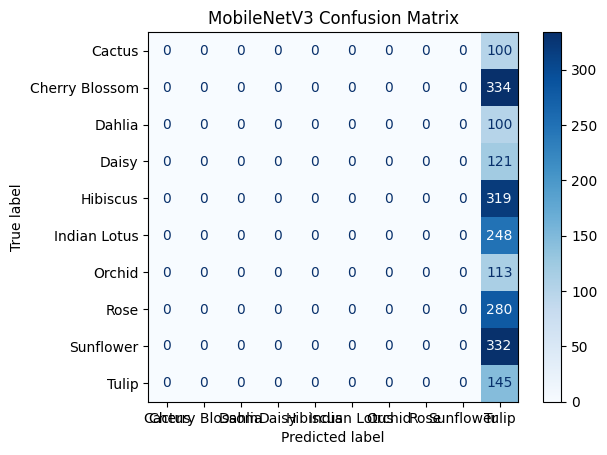

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(cm, model_name):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm_resnet, 'ResNet50')

plot_confusion_matrix(cm_densenet, 'DenseNet121')

plot_confusion_matrix(cm_mobilenet, 'MobileNetV3')


Performance of the Models Against the Testing Dataset

In [17]:
import numpy as np
from sklearn.metrics import average_precision_score

def calculate_mAP(model, test_generator):
    y_true = test_generator.classes
    y_pred_probs = model.predict(test_generator)
    y_pred = np.argmax(y_pred_probs, axis=-1)

    y_true_one_hot = np.eye(len(test_generator.class_indices))[y_true]

    average_precisions = []
    for i in range(len(test_generator.class_indices)):
        average_precisions.append(average_precision_score(y_true_one_hot[:, i], y_pred_probs[:, i]))
    
    mAP = np.mean(average_precisions)
    return mAP

mAP_resnet = calculate_mAP(resnet_model, test_generator)

mAP_densenet = calculate_mAP(densenet_model, test_generator)

mAP_mobilenet = calculate_mAP(mobilenet_model, test_generator)


66/66 [==============================] - 16s 237ms/step


Conclusion

In [18]:
print(f"ResNet50: Accuracy = {accuracy_resnet}, mAP = {mAP_resnet}, Training Time = {training_time_resnet}")
print(f"DenseNet121: Accuracy = {accuracy_densenet}, mAP = {mAP_densenet}, Training Time = {training_time_densenet}")
print(f"MobileNetV3: Accuracy = {accuracy_mobilenet}, mAP = {mAP_mobilenet}, Training Time = {training_time_mobilenet}")

ResNet50: Accuracy = 0.7590821981430054, mAP = 0.10469871106952386, Training Time = 3084.8263325691223
DenseNet121: Accuracy = 0.8178776502609253, mAP = 0.10307882206144639, Training Time = 3107.3564064502716
MobileNetV3: Accuracy = 0.06931166350841522, mAP = 0.10205453642125246, Training Time = 2993.769019126892
